In [2]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#modules for predictive models
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture as GMM

from sklearn.metrics import silhouette_samples, silhouette_score

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

In [4]:
retail_df = pd.read_csv("CustomerPurchaseData.csv")

In [5]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/2013,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,8/8/2012,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,9/9/2012,52,1,...,6,1,0,0,0,0,0,3,11,0.0


In [7]:
retail2_df = pd.read_csv('UserAppBehaviour.csv')

In [8]:
retail2_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [9]:
retail_df.shape

(2239, 29)

In [10]:
retail2_df.shape

(5630, 20)

In [11]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [12]:
retail2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [13]:
retail_ms = retail_df[retail_df['Marital_Status']=='Single']
retail_ms.shape

(480, 29)

In [14]:
#remove canceled orders
retail_rcy = retail_df[retail_df['Recency']>0]
retail_rcy.shape

(2211, 29)

In [18]:
retail2_df.dropna(subset=['CustomerID'],how='all',inplace=True)
retail2_df.shape

(5630, 20)

In [21]:
retail2_df = retail_df[retail_df['Dt_Customer']>= "2010-12-09"]
retail2_df.shape

(1254, 29)

In [26]:
print("Summary..")
#exploring the unique values of each attribute
print("Total Number of Income: ", retail_df['Income'].nunique())
print("Number of products bought: ",retail_df['Recency'].nunique())

Summary..
Total Number of Income:  1976
Number of products bought:  100


In [27]:
#last date available in our dataset
retail_df['Recency'].max()

99

In [28]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [33]:
retail_df['Date'] = pd.to_datetime(retail_df['Dt_Customer'], errors='coerce')

In [34]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Date
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,0,0,0,0,0,0,3,11,0.0,2012-11-13
1,8373,1979,Basic,Together,24594.0,1,0,10/12/2013,94,1,...,0,0,0,0,0,0,3,11,0.0,2013-10-12
2,5342,1976,Basic,Divorced,9548.0,1,0,8/8/2012,31,0,...,0,0,0,0,0,0,3,11,0.0,2012-08-08
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,0,0,0,0,0,0,3,11,0.0,2014-06-15
4,9733,1978,Basic,Together,24882.0,1,0,9/9/2012,52,1,...,1,0,0,0,0,0,3,11,0.0,2012-09-09


In [49]:
#group by customers and check last date of purshace
recency_df = retail_df.groupby(by='ID', as_index=False)['Date'].max()
recency_df.columns = ['ID','OrderAmountHikeFromlastYear']
recency_df.head()

,ID,OrderAmountHikeFromlastYear
0,0,2013-04-05
1,1,2014-06-15
2,9,2012-08-18
3,13,2013-07-22
4,17,2013-06-09


In [53]:
from datetime import datetime
now = pd.Timestamp(datetime.now())
# Rest of your code...
recency_df['ID'] = recency_df['OrderAmountHikeFromlastYear'].apply(lambda x: (now - x).days)

In [54]:
recency_df.head()

,ID,OrderAmountHikeFromlastYear
0,3713,2013-04-05
1,3277,2014-06-15
2,3943,2012-08-18
3,3605,2013-07-22
4,3648,2013-06-09


In [58]:
# drop duplicates
retail_df_copy = retail_df
retail_df_copy.drop_duplicates(subset=['ID', 'Recency'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_df_copy.groupby(by=['Recency'], as_index=False)['ID'].count()
frequency_df.columns = ['ID','Frequency']
frequency_df.head()

,ID,Frequency
0,0,28
1,1,24
2,2,28
3,3,29
4,4,27


In [59]:
#create column total cost
retail_df['TotalCost'] = retail_df['Income'] * retail_df['Recency']

In [60]:
monetary_df = retail_df.groupby(by='ID',as_index=False).agg({'TotalCost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,0,4682766.0
1,1,0.0
2,9,3964428.0
3,13,1445406.0
4,17,4899771.0


## EDA

In [75]:
retail_df = pd.read_csv("CustomerPurchaseData.csv")

In [76]:
#check the head of the dataset
retail_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/2013,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,8/8/2012,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,9/9/2012,52,1,...,6,1,0,0,0,0,0,3,11,0.0
5,4669,1981,Basic,Married,24480.0,1,0,11/2/2013,46,4,...,7,0,0,0,0,0,0,3,11,0.0
6,8234,1973,Basic,Together,27190.0,1,0,15/08/13,13,1,...,8,1,0,0,0,0,0,3,11,1.0
7,8151,1990,Basic,Married,24279.0,0,0,29/12/12,6,16,...,8,0,0,0,0,0,0,3,11,0.0
8,2457,1975,Basic,Married,30801.0,0,1,26/10/12,23,8,...,7,0,0,0,0,0,0,3,11,0.0
9,6682,1973,Basic,Married,18978.0,1,0,11/12/2012,41,2,...,8,0,0,0,0,0,0,3,11,0.0


In [77]:
retail_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2239.000000,2239.000000,2238.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2216.000000
mean,9149.564538,1968.802144,51435.772118,0.443502,0.500223,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.150271
std,10605.188253,11.985494,22047.706404,0.537513,0.543772,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.357417
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,3383.500000,1959.000000,34730.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,6019.000000,1970.000000,51075.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,9043.500000,1977.000000,68279.250000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,47392.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [82]:
retail_df.columns 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntSnacksProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [88]:
retail2_df = pd.read_csv("UserAppBehaviour.csv")

In [89]:
retail2_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [90]:
retail2_df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [91]:
cancelled_orders = retail2_df[retail2_df['PreferredPaymentMode'].astype(str).str.contains('C')]
cancelled_orders.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139


In [95]:
cancelled_orders[cancelled_orders['PreferredPaymentMode']==-160]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [99]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = retail2_df['PreferredPaymentMode'].nunique()
cancelled_number = len(cancelled_orders)

We have  4602  cancelled orders.


In [132]:
temp_df =retail2_df.groupby(['CustomerID','PreferredPaymentMode'],as_index=False)['CashbackAmount'].count()
transaction_df = temp_df.rename(columns = {'CashbackAmount':'Number_of_products'})
transaction_df.head()

,CustomerID,PreferredPaymentMode,Number_of_products
0,50001,Debit Card,1
1,50002,UPI,1
2,50003,Debit Card,1
3,50004,Debit Card,1
4,50005,CC,1


In [129]:
transaction_df.describe()

,CustomerID,Number_of_products
count,5630.000000,5630.0
mean,52815.500000,1.0
std,1625.385339,0.0
min,50001.000000,1.0
25%,51408.250000,1.0
50%,52815.500000,1.0
75%,54222.750000,1.0
max,55630.000000,1.0


In [133]:
retail_df['total_cost'] = retail_df['Income'] * retail_df['Recency']

In [134]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_cost
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,0,0,0,0,0,0,3,11,0.0,442500.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/2013,94,1,...,0,0,0,0,0,0,3,11,0.0,2311836.0
2,5342,1976,Basic,Divorced,9548.0,1,0,8/8/2012,31,0,...,0,0,0,0,0,0,3,11,0.0,295988.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,0,0,0,0,0,0,3,11,0.0,2259920.0
4,9733,1978,Basic,Together,24882.0,1,0,9/9/2012,52,1,...,1,0,0,0,0,0,3,11,0.0,1293864.0


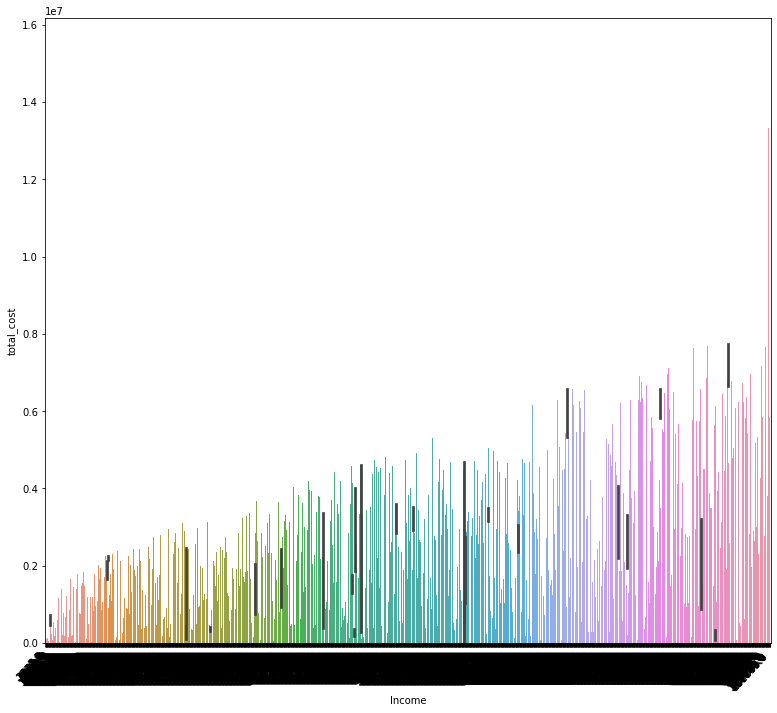

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(13, 11.5)
ax=sns.barplot(x='Income', y='total_cost',data=retail_df,estimator=max,ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [137]:
retail_df.groupby('Income').sum().sort_values(by='total_cost', ascending=False)

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,total_cost
Income,,,,,,,,,,,,,,,,,,,,,
86857.0,15656,3944,0,0,192,1798,204,1676,266,204,...,0,0,0,0,0,0,6,22,2.0,16676544.0
84906.0,11845,3944,0,0,196,1994,30,828,198,60,...,0,2,2,0,2,0,6,22,0.0,16641576.0
84618.0,9755,3930,0,0,192,1368,200,1602,42,132,...,0,0,2,0,0,0,6,22,0.0,16246656.0
157243.0,8475,1973,0,1,98,20,2,1582,1,2,...,0,0,0,0,0,0,3,11,0.0,15409814.0
77766.0,9280,3934,0,2,194,2008,118,530,230,118,...,2,0,0,0,0,0,6,22,2.0,15086604.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57731.0,25091,1969,0,1,0,266,21,300,65,8,...,0,0,0,0,0,0,3,11,0.0,0.0
54809.0,45163,3954,2,2,0,126,12,114,26,26,...,0,0,0,0,0,0,6,22,1.0,0.0
54450.0,13862,3912,2,2,0,908,0,342,16,38,...,0,0,0,0,0,0,6,22,0.0,0.0
